**Tropical Cyclone Freddy**


**How did Pangu-AI-forecast perform on predicting Freddy using ERA5-data as a comparison?**

**Aim of this document**
- compare the storm severity/danger 500 hPa q (potential rain indicator) and surface winds

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from datetime import datetime
import sys
import warnings
from glob import glob
import netCDF4 as nc
import h5netcdf
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.dates import DateFormatter, HourLocator
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message=".*invalid value encountered in intersects.*")

**Load the data**

In [2]:
## ERA5
era =  xr.open_dataset('../data//processed/ERA_processed_TC_Freddy.nc')

# Pangu
pangu = xr.open_dataset("../data/processed/Pangu_processed_TC_Freddy.nc")

**Load plotting functions**

In [3]:
%run ../functions/plot_functions.ipynb

**Define ranges and colors for plotting**

In [6]:
# Ranges of variables for discrete legends
q_levels = np.linspace(0,8,9)
tp_levels = np.arange(0,0.015,0.003)
u_levels_contour = np.linspace(0,30,9)


q_diff_levels = np.arange(-0.004, 0.004001, 0.001)
q_diff_levels = q_diff_levels[q_diff_levels != 0]
msl_diff_levels = np.arange(-20,20,5)

# Color schemes
colors_q = ['lightcyan', 'lightblue', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'royalblue',"blue", 'mediumblue']
q_cmap = colors.LinearSegmentedColormap.from_list('colors_q', colors_q, N=8)

**Storm danger** - specific humidity (500 hPa) and surface wind speed

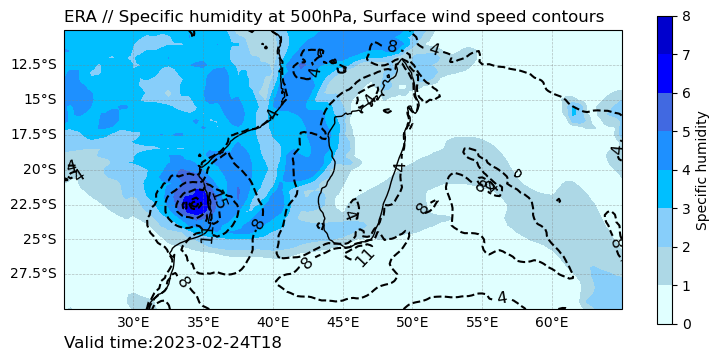

In [7]:
# ERA
era_contourfPA_contour(data=era,
                       contourf_var=era.q,
                       contourf_var_inwords="Specific humidity",
                       contour_var=era.wind_speed_sfc,
                       contour_var_inwords="Surface wind speed",
                       step_time = "2023-02-24T18:00:00.000000000",
                       pressure = 500,
                       contourf_lvl = q_levels,
                       contour_lvl= u_levels_contour,
                       legend_colormap= q_cmap,
                      )

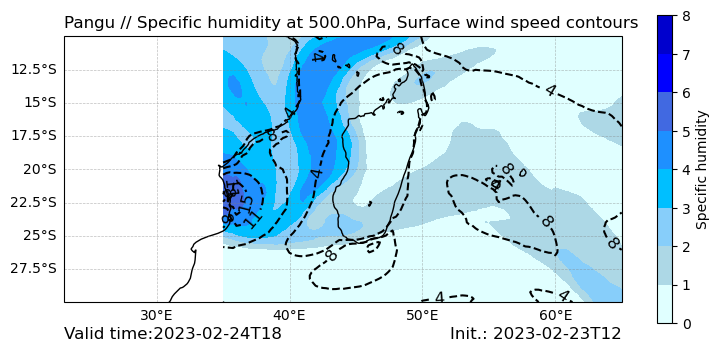

In [8]:
# pangu
pangu_contourfPA_contour(data = pangu,
                              contourf_var = pangu.q,
                              contour_var = pangu.wind_speed_sfc,
                              ttime = 2,
                              step_time = 4,
                              pressure = 1,
                              contourf_lvl = q_levels,
                              contour_lvl = u_levels_contour,
                              legend_colormap = q_cmap,
                             )